In [ ]:
#del/s/ah desktop.ini

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

temp1 = r'C:\Users\lenovo\OneDrive - mgmtech\Documents\MIT WPU\4. FY\Capstone\Pharmaceutical and Biomedical Waste (PBW)\Train Images'
temp2 = r'C:\Users\lenovo\OneDrive - mgmtech\Documents\MIT WPU\4. FY\Capstone\Pharmaceutical and Biomedical Waste (PBW)\Test Images'
converted_path1 = temp1.replace("\\", "/")
train_path = converted_path1
converted_path2 = temp2.replace("\\", "/")
valid_path = converted_path2
print(train_path)

C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images


In [ ]:


inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:

for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images/*')

In [7]:
folders

['C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images\\(BT) Body Tissue or Organ',
 'C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images\\(GE) Glass equipment-packaging 551',
 'C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images\\(ME) Metal equipment -packaging',
 'C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images\\(OW) Organic wastes',
 'C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images\\(PE) Plastic equipment-packaging',
 'C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images\\(PP) Paper equipment-packaging',
 'C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/

In [ ]:

x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)


model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,417,196 (85.51 MB)

 Trainable params: 614,412 (2.34 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5259 images belonging to 12 classes.


In [14]:
test_set = test_datagen.flow_from_directory('C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Test Images',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1327 images belonging to 12 classes.


In [ ]:

r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.7084 - loss: 4.5599

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.7094 - loss: 4.5426 - val_accuracy: 0.9729 - val_loss: 0.1647
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9676 - loss: 0.2044 - val_accuracy: 0.9683 - val_loss: 0.2420
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9689 - loss: 0.2789 - val_accuracy: 0.9729 - val_loss: 0.2589
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.9754 - loss: 0.2620 - val_accuracy: 0.9849 - val_loss: 0.1518
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.9831 - loss: 0.2140 - val_accuracy: 0.9721 - val_loss: 0.2976
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.9776 - loss: 0.3004 - val_accuracy: 0.9691 - val_loss: 0.3832
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.9768 - loss: 0.3321 - val_accuracy: 0.9842 - val_loss: 0.2544
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.9873 - loss: 0.1764 - val_accuracy: 0.966

In [17]:
import matplotlib.pyplot as plt

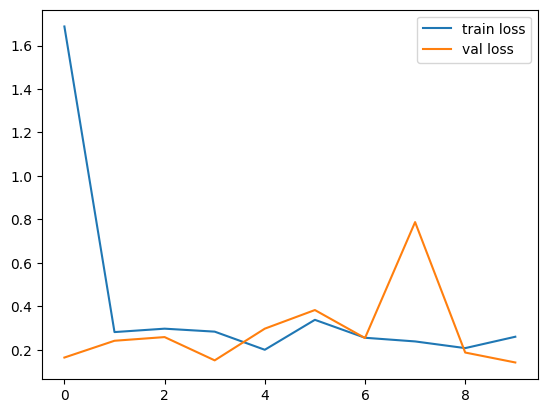

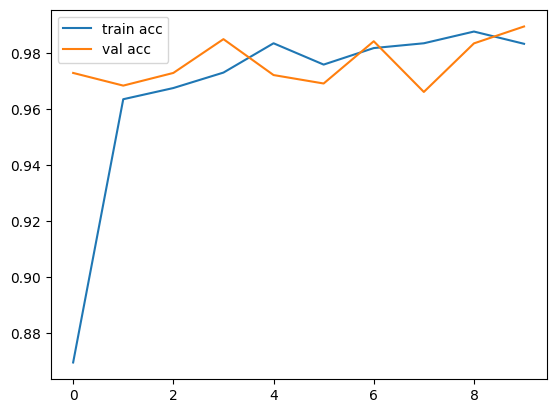

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:


from tensorflow.keras.models import load_model

model.save('model_inception_Test.h5')

In [21]:

y_pred = model.predict(test_set)


42/42 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step


In [22]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.6246054e-17, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.8761105e-29, 0.0000000e+00]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([5, 3, 2, ..., 5, 5, 3], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_inception.h5')

In [28]:
img=image.load_img('C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Github/Capstone/Test Images/test img.jpeg',target_size=(224,224))



In [29]:
x=image.img_to_array(img)
x

array([[[243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.],
        ...,
        [243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.]],

       [[243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.],
        ...,
        [243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.]],

       [[243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.],
        ...,
        [243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.]],

       ...,

       [[245., 246., 251.],
        [245., 246., 251.],
        [245., 246., 251.],
        ...,
        [243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.]],

       [[245., 246., 251.],
        [245., 246., 251.],
        [245., 246., 251.],
        ...,
        [243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.]],

       [[245., 246., 251.],
        [245., 246., 251.],
        [245., 2

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[3.9720938e-01, 1.9572169e-11, 5.4722821e-10, 6.0223854e-01,
        6.2337668e-14, 1.0525947e-06, 2.5887950e-04, 4.0437292e-10,
        2.8699150e-04, 6.6251696e-12, 1.4156714e-08, 5.1251131e-06]],
      dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [35]:
a==1

array([False])

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.18.0'

In [ ]:

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  
class_labels = training_set.class_indices  
class_labels = {v: k for k, v in class_labels.items()}  


print(f"Predicted class: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted class: (SN) Syringe needles


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


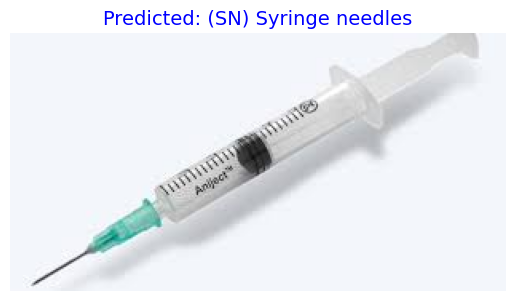

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

img_path = 'C:/Users/lenovo/OneDrive - mgmtech/Documents/MIT WPU/4. FY/Capstone/Github/Capstone/Test Images/test img.jpeg'  # Change this to your image filename
img = image.load_img(img_path, target_size=(224, 224))  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array = preprocess_input(img_array)  


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  

class_labels = training_set.class_indices  
class_labels = {v: k for k, v in class_labels.items()}  


plt.imshow(image.load_img(img_path))  
plt.axis('off') 
plt.title(f"Predicted: {class_labels[predicted_class[0]]}", fontsize=14, color='blue')  # Display class
plt.show()